Team IC24046

Members: Anthony Cheng, David Chu, Eric Huang, and Ethan Chang

In [611]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [612]:
data_dictionary = pd.read_csv("/content/sample_data/02 Data Dictionary.csv")
ff_sr = pd.read_csv("/content/sample_data/FF_SR_ data.csv")
food_cat_id = pd.read_csv("/content/sample_data/food_category_id table.csv")
nutrient_id = pd.read_csv("/content/sample_data/nutrient_id table.csv")

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

ff_sr = ff_sr.drop_duplicates(["FF Food description", "FF_Component"])

In [613]:
ff_sr.head()


,FF_NDB,SR_NDB,food_category_id,FF Food description,SR Food description,Nutrient_id,rank,FF_Component,SR_Component,unit_name,...,SR Min,SR Max,Std_Error,SR Num_Data_pts,FF Mean per 100g,FF Min,FF Max,FF Median,FF data_points,FF Publication Date
0,16158,16158,16,"Hummus, commercial","Hummus, commercial",1090,5500,"Magnesium, Mg","Magnesium, Mg",MG,...,NaN,NaN,NaN,2,71.10,56.60,82.00,70.40,11.0,4/1/2019
1,16158,16158,16,"Hummus, commercial","Hummus, commercial",1258,9700,"Fatty acids, total saturated","Fatty acids, total saturated",G,...,NaN,NaN,NaN,0,2.22,NaN,NaN,NaN,NaN,4/1/2019
2,16158,16158,16,"Hummus, commercial","Hummus, commercial",1089,5400,"Iron, Fe","Iron, Fe",MG,...,NaN,NaN,NaN,2,2.41,1.87,2.96,2.33,11.0,4/1/2019
3,16158,16158,16,"Hummus, commercial","Hummus, commercial",1051,100,Water,Water,G,...,NaN,NaN,NaN,2,58.70,56.10,65.60,57.60,11.0,4/1/2019
4,16158,16158,16,"Hummus, commercial","Hummus, commercial",1103,6200,"Selenium, Se","Selenium, Se",UG,...,NaN,NaN,NaN,0,16.20,0.00,32.30,16.20,2.0,4/1/2019


In [614]:
#splitting ff_sr
ff_df = ff_sr[["FF_NDB", "FF Food description", "Nutrient_id", "FF_Component", "FF Mean per 100g", "FF Min", "FF Max", "FF Median", "FF data_points", "FF Publication Date"]]

sr_df = ff_sr[["SR_NDB","food_category_id","SR Food description","Nutrient_id","rank", "SR_Component","unit_name","SR Mean per 100g","SR Min","SR Max"," Std_Error", "SR Num_Data_pts"]]



In [615]:
#Looks for FF - SR
net_pos = pd.DataFrame()
net_pos = ff_sr[["FF_NDB", "SR_NDB", "FF Food description","Nutrient_id","unit_name", "FF Mean per 100g", "SR Mean per 100g", "FF_Component"]]

net_pos['rank'] = ff_df["FF Mean per 100g"] - sr_df["SR Mean per 100g"];
net_pos['percent_change'] = net_pos['rank'] / sr_df["SR Mean per 100g"]
net_pos['percent_change'] = net_pos['percent_change'].fillna(0)

#net_pos['rank'] = net_pos['rank'].abs().groupby.rank(ascending=False)
#net_pos['rank'] = net_pos['rank'].abs().groupby(net_pos['rank']).rank(ascending=False)
#df['rank'] = df['columnB'].abs().groupby(df['columnA']).rank(ascending=False)



# rows sorted by percent change of mean per 100g (from SR to FF)
net_pos.sort_values(by="percent_change").head(10)

<ipython-input-615-b8c1f66e4856>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  net_pos['rank'] = ff_df["FF Mean per 100g"] - sr_df["SR Mean per 100g"];
<ipython-input-615-b8c1f66e4856>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  net_pos['percent_change'] = net_pos['rank'] / sr_df["SR Mean per 100g"]
<ipython-input-615-b8c1f66e4856>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,FF_NDB,SR_NDB,FF Food description,Nutrient_id,unit_name,FF Mean per 100g,SR Mean per 100g,FF_Component,rank,percent_change
1222,1079,1079,"Milk, reduced fat, fluid, 2% milkfat, with added vitamin A and vitamin D",1010,G,0.0,0.010,Sucrose,-0.010,-1.0
4113,10224,10224,"Pork, loin, boneless, raw",1101,MG,0.0,0.007,"Manganese, Mn",-0.007,-1.0
172,1173,1173,"Egg, white, dried",1089,MG,0.0,0.150,"Iron, Fe",-0.150,-1.0
2075,9500,9500,"Apples, red delicious, with skin, raw",1093,MG,0.0,1.000,"Sodium, Na",-1.000,-1.0
2076,9500,9500,"Apples, red delicious, with skin, raw",1089,MG,0.0,0.110,"Iron, Fe",-0.110,-1.0
2078,9500,9500,"Apples, red delicious, with skin, raw",1177,UG,0.0,3.000,"Folate, total",-3.000,-1.0
3066,1012,1012,"Cottage cheese, full fat, large or small curd",1101,MG,0.0,0.002,"Manganese, Mn",-0.002,-1.0
3053,12220,12220,"Flaxseed, ground",1109,MG,0.0,0.310,Vitamin E (alpha-tocopherol),-0.310,-1.0
180,1173,1173,"Egg, white, dried",1101,MG,0.0,0.007,"Manganese, Mn",-0.007,-1.0
2120,9504,9504,"Apples, fuji, with skin, raw",1177,UG,0.0,3.000,"Folate, total",-3.000,-1.0


In [616]:
print(ff_sr.iloc[[1327]]["SR Mean per 100g"])
print(ff_sr.iloc[[1327]]["FF Mean per 100g"])
print((net_pos.iloc[[1327]])["percent_change"])
ff_sr.iloc[[1327]]
# row with greatest percent change (from SR to FF)

1366    0.233
Name: SR Mean per 100g, dtype: float64
1366    0.242
Name: FF Mean per 100g, dtype: float64
1366    0.038627
Name: percent_change, dtype: float64


,FF_NDB,SR_NDB,food_category_id,FF Food description,SR Food description,Nutrient_id,rank,FF_Component,SR_Component,unit_name,...,SR Min,SR Max,Std_Error,SR Num_Data_pts,FF Mean per 100g,FF Min,FF Max,FF Median,FF data_points,FF Publication Date
1366,7089,7089,7,"Sausage, Italian, pork, mild, cooked, pan-fried","Sausage, Italian, pork, cooked",1166,6500,Riboflavin,Riboflavin,MG,...,NaN,NaN,0.016,4,0.242,0.22,0.27,0.24,4.0,12/16/2019


In [617]:
# rows where the mean per 100g went to 0 (from SR to FF)
ff_sr[(ff_sr["FF Mean per 100g"]==0) & (ff_sr["SR Mean per 100g"]!=0)].head(10)

,FF_NDB,SR_NDB,food_category_id,FF Food description,SR Food description,Nutrient_id,rank,FF_Component,SR_Component,unit_name,...,SR Min,SR Max,Std_Error,SR Num_Data_pts,FF Mean per 100g,FF Min,FF Max,FF Median,FF data_points,FF Publication Date
47,11056,11056,11,"Beans, snap, green, canned, regular pack, drained solids","Beans, snap, green, canned, regular pack, drained solids",1010,1600,Sucrose,Sucrose,G,...,0.180,0.180,0.000,6,0.0,0.0,0.0,0.0,6.0,4/1/2019
60,12563,12563,12,"Nuts, almonds, dry roasted, with salt added","Nuts, almonds, dry roasted, with salt added",1127,8200,"Tocopherol, delta","Tocopherol, delta",MG,...,0.000,0.370,0.034,23,0.0,0.0,0.0,0.0,8.0,4/1/2019
62,12563,12563,12,"Nuts, almonds, dry roasted, with salt added","Nuts, almonds, dry roasted, with salt added",1103,6200,"Selenium, Se","Selenium, Se",UG,...,0.000,3.700,0.860,5,0.0,NaN,NaN,0.0,1.0,4/1/2019
63,12563,12563,12,"Nuts, almonds, dry roasted, with salt added","Nuts, almonds, dry roasted, with salt added",1012,1800,Fructose,Fructose,G,...,0.000,0.100,0.003,22,0.0,0.0,0.0,0.0,3.0,4/1/2019
75,12563,12563,12,"Nuts, almonds, dry roasted, with salt added","Nuts, almonds, dry roasted, with salt added",1011,1700,Glucose,Glucose (dextrose),G,...,0.000,0.040,0.012,22,0.0,0.0,0.0,0.0,3.0,4/1/2019
92,12563,12563,12,"Nuts, almonds, dry roasted, with salt added","Nuts, almonds, dry roasted, with salt added",1014,2000,Maltose,Maltose,G,...,0.000,0.200,0.054,15,0.0,0.0,0.0,0.0,3.0,4/1/2019
135,1171,1171,1,"Egg, whole, raw, frozen, pasteurized","Egg, whole, raw, frozen, pasteurized",1101,6100,"Manganese, Mn","Manganese, Mn",MG,...,0.024,0.045,NaN,3,0.0,0.0,0.0,0.0,14.0,4/1/2019
142,1171,1171,1,"Egg, whole, raw, frozen, pasteurized","Egg, whole, raw, frozen, pasteurized",1098,6000,"Copper, Cu","Copper, Cu",MG,...,NaN,NaN,NaN,2,0.0,0.0,0.0,0.0,14.0,4/1/2019
148,1172,1172,1,"Egg, white, raw, frozen, pasteurized","Egg, white, raw, frozen, pasteurized",1098,6000,"Copper, Cu","Copper, Cu",MG,...,0.030,0.034,NaN,3,0.0,0.0,0.0,0.0,16.0,4/1/2019
152,1172,1172,1,"Egg, white, raw, frozen, pasteurized","Egg, white, raw, frozen, pasteurized",1091,5600,"Phosphorus, P","Phosphorus, P",MG,...,12.000,14.000,NaN,3,0.0,0.0,0.0,0.0,16.0,4/1/2019


In [618]:
# rows where SS mean was 0
print(len(ff_sr[ff_sr["SR Mean per 100g"]==0].index))
ff_sr[ff_sr["SR Mean per 100g"]==0].head(10)

366


,FF_NDB,SR_NDB,food_category_id,FF Food description,SR Food description,Nutrient_id,rank,FF_Component,SR_Component,unit_name,...,SR Min,SR Max,Std_Error,SR Num_Data_pts,FF Mean per 100g,FF Min,FF Max,FF Median,FF data_points,FF Publication Date
26,16158,16158,16,"Hummus, commercial","Hummus, commercial",1162,6300,"Vitamin C, total ascorbic acid","Vitamin C, total ascorbic acid",MG,...,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,6.0,4/1/2019
29,11056,11056,11,"Beans, snap, green, canned, regular pack, drained solids","Beans, snap, green, canned, regular pack, drained solids",1014,2000,Maltose,Maltose,G,...,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,6.0,4/1/2019
33,11056,11056,11,"Beans, snap, green, canned, regular pack, drained solids","Beans, snap, green, canned, regular pack, drained solids",1075,2100,Galactose,Galactose,G,...,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,6.0,4/1/2019
48,11056,11056,11,"Beans, snap, green, canned, regular pack, drained solids","Beans, snap, green, canned, regular pack, drained solids",1013,1900,Lactose,Lactose,G,...,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,6.0,4/1/2019
53,12563,12563,12,"Nuts, almonds, dry roasted, with salt added","Nuts, almonds, dry roasted, with salt added",1162,6300,"Vitamin C, total ascorbic acid","Vitamin C, total ascorbic acid",MG,...,0.0,0.0,0.0,3,0.0,0.0,0.0,0.0,2.0,4/1/2019
58,12563,12563,12,"Nuts, almonds, dry roasted, with salt added","Nuts, almonds, dry roasted, with salt added",1013,1900,Lactose,Lactose,G,...,0.0,0.0,0.0,15,0.0,0.0,0.0,0.0,3.0,4/1/2019
71,12563,12563,12,"Nuts, almonds, dry roasted, with salt added","Nuts, almonds, dry roasted, with salt added",1106,7420,"Vitamin A, RAE","Vitamin A, RAE",UG,...,NaN,NaN,NaN,0,2.0,NaN,NaN,NaN,NaN,4/1/2019
72,12563,12563,12,"Nuts, almonds, dry roasted, with salt added","Nuts, almonds, dry roasted, with salt added",1185,8800,Vitamin K (phylloquinone),Vitamin K (phylloquinone),UG,...,NaN,NaN,NaN,0,0.0,NaN,NaN,0.0,1.0,4/1/2019
74,12563,12563,12,"Nuts, almonds, dry roasted, with salt added","Nuts, almonds, dry roasted, with salt added",1122,7530,Lycopene,Lycopene,UG,...,NaN,NaN,NaN,0,0.0,NaN,NaN,0.0,1.0,4/1/2019
77,12563,12563,12,"Nuts, almonds, dry roasted, with salt added","Nuts, almonds, dry roasted, with salt added",1075,2100,Galactose,Galactose,G,...,0.0,0.0,NaN,2,0.0,0.0,0.0,0.0,3.0,4/1/2019


In [619]:
#FF and SR that have Mean Per 100g = 0
zero_change = ff_sr[(ff_sr["SR Mean per 100g"]==0) & (ff_sr["FF Mean per 100g"]==0)]
zero_change.head(10)

,FF_NDB,SR_NDB,food_category_id,FF Food description,SR Food description,Nutrient_id,rank,FF_Component,SR_Component,unit_name,...,SR Min,SR Max,Std_Error,SR Num_Data_pts,FF Mean per 100g,FF Min,FF Max,FF Median,FF data_points,FF Publication Date
26,16158,16158,16,"Hummus, commercial","Hummus, commercial",1162,6300,"Vitamin C, total ascorbic acid","Vitamin C, total ascorbic acid",MG,...,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,6.0,4/1/2019
29,11056,11056,11,"Beans, snap, green, canned, regular pack, drained solids","Beans, snap, green, canned, regular pack, drained solids",1014,2000,Maltose,Maltose,G,...,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,6.0,4/1/2019
33,11056,11056,11,"Beans, snap, green, canned, regular pack, drained solids","Beans, snap, green, canned, regular pack, drained solids",1075,2100,Galactose,Galactose,G,...,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,6.0,4/1/2019
48,11056,11056,11,"Beans, snap, green, canned, regular pack, drained solids","Beans, snap, green, canned, regular pack, drained solids",1013,1900,Lactose,Lactose,G,...,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,6.0,4/1/2019
53,12563,12563,12,"Nuts, almonds, dry roasted, with salt added","Nuts, almonds, dry roasted, with salt added",1162,6300,"Vitamin C, total ascorbic acid","Vitamin C, total ascorbic acid",MG,...,0.0,0.0,0.0,3,0.0,0.0,0.0,0.0,2.0,4/1/2019
58,12563,12563,12,"Nuts, almonds, dry roasted, with salt added","Nuts, almonds, dry roasted, with salt added",1013,1900,Lactose,Lactose,G,...,0.0,0.0,0.0,15,0.0,0.0,0.0,0.0,3.0,4/1/2019
72,12563,12563,12,"Nuts, almonds, dry roasted, with salt added","Nuts, almonds, dry roasted, with salt added",1185,8800,Vitamin K (phylloquinone),Vitamin K (phylloquinone),UG,...,NaN,NaN,NaN,0,0.0,NaN,NaN,0.0,1.0,4/1/2019
74,12563,12563,12,"Nuts, almonds, dry roasted, with salt added","Nuts, almonds, dry roasted, with salt added",1122,7530,Lycopene,Lycopene,UG,...,NaN,NaN,NaN,0,0.0,NaN,NaN,0.0,1.0,4/1/2019
77,12563,12563,12,"Nuts, almonds, dry roasted, with salt added","Nuts, almonds, dry roasted, with salt added",1075,2100,Galactose,Galactose,G,...,0.0,0.0,NaN,2,0.0,0.0,0.0,0.0,3.0,4/1/2019
110,11233,11233,11,"Kale, raw","Kale, raw",1122,7530,Lycopene,Lycopene,UG,...,NaN,NaN,NaN,1,0.0,0.0,0.0,0.0,3.0,4/1/2019


In [620]:
nutrient_table = ff_sr[["FF Food description", "FF_Component", "FF Mean per 100g", "SR Food description", "SR_Component", "SR Mean per 100g"]]
nutrient_table.head()

,FF Food description,FF_Component,FF Mean per 100g,SR Food description,SR_Component,SR Mean per 100g
0,"Hummus, commercial","Magnesium, Mg",71.10,"Hummus, commercial","Magnesium, Mg",71.000
1,"Hummus, commercial","Fatty acids, total saturated",2.22,"Hummus, commercial","Fatty acids, total saturated",1.437
2,"Hummus, commercial","Iron, Fe",2.41,"Hummus, commercial","Iron, Fe",2.440
3,"Hummus, commercial",Water,58.70,"Hummus, commercial",Water,66.590
4,"Hummus, commercial","Selenium, Se",16.20,"Hummus, commercial","Selenium, Se",2.600


In [621]:
# rows where percent change is -1, SR originally has something, FF indicates that said values decreased to 0 or were lost
net_pos_percent = net_pos[net_pos["percent_change"] == -1].sort_values(by=['FF_NDB'])
net_pos_percent["FF_NDB"] = (net_pos_percent["FF_NDB"]/1000).astype(int)
net_pos_percent["SR_NDB"] = (net_pos_percent["SR_NDB"]/1000).astype(int)

#print(net_pos_percent["FF_NDB"].unique())
#[ 1  2  4  5  7  9 10 11 12 14 16 20 23 43]
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==1])/200)*100) #40% of the negative changes belong to group 1: "Dairy and Egg Products"
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==2])/200)*100)
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==4])/200)*100)
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==5])/200)*100)
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==7])/200)*100)
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==9])/200)*100)
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==10])/200)*100)
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==11])/200)*100)
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==12])/200)*100)
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==14])/200)*100)
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==16])/200)*100)
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==20])/200)*100)
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==23])/200)*100)
print((len(net_pos_percent[net_pos_percent["FF_NDB"]==43])/200)*100)

print((len(net_pos_percent[net_pos_percent["FF_NDB"]==1])/1357)*100) #40% of the negative changes belong to group 1: "Dairy and Egg Products"

40.0
2.0
2.5
1.5
2.0
13.0
1.0
18.5
7.5
2.5
1.5
3.5000000000000004
2.0
1.0
5.895357406042741


In [622]:
#1357 food category 1 items
ff_sr['FF Food description'].value_counts()[1]

68

In [623]:
# rows where percent change in infinity, original value was 0, later increased in added nutrients
net_pos[net_pos["percent_change"]==np.inf]

,FF_NDB,SR_NDB,FF Food description,Nutrient_id,unit_name,FF Mean per 100g,SR Mean per 100g,FF_Component,rank,percent_change
71,12563,12563,"Nuts, almonds, dry roasted, with salt added",1106,UG,2.000000,0.0,"Vitamin A, RAE",2.000000,inf
150,1172,1172,"Egg, white, raw, frozen, pasteurized",1004,G,0.160000,0.0,Total lipid (fat),0.160000,inf
156,1172,1172,"Egg, white, raw, frozen, pasteurized",1253,MG,3.000000,0.0,Cholesterol,3.000000,inf
175,1173,1173,"Egg, white, dried",1004,G,0.650000,0.0,Total lipid (fat),0.650000,inf
181,1173,1173,"Egg, white, dried",1253,MG,17.000000,0.0,Cholesterol,17.000000,inf
408,12537,12537,"Seeds, sunflower seed kernels, dry roasted, with salt added",1106,UG,1.000000,0.0,"Vitamin A, RAE",1.000000,inf
435,12537,12537,"Seeds, sunflower seed kernels, dry roasted, with salt added",1126,MG,0.970000,0.0,"Tocopherol, gamma",0.970000,inf
450,12537,12537,"Seeds, sunflower seed kernels, dry roasted, with salt added",1128,MG,0.050000,0.0,"Tocotrienol, alpha",0.050000,inf
482,18069,18069,"Bread, white, commercially prepared",1013,G,0.060000,0.0,Lactose,0.060000,inf
504,2046,2046,"Mustard, prepared, yellow",1125,MG,0.010000,0.0,"Tocopherol, beta",0.010000,inf


In [624]:
# making dataframe for FF components
sorted_FF = sorted(net_pos["FF_Component"].unique())
neg1_count = np.array([])
neg_count = np.array([])
zero_count = np.array([])
pos_count = np.array([])
inf_count = np.array([])

for comp in sorted_FF:
  net_pos_of_comp = net_pos[net_pos["FF_Component"] == comp]
  neg1_count = np.append(neg1_count, len(net_pos_of_comp[net_pos_of_comp["percent_change"] == -1].index))
  neg_count = np.append(neg_count, len(net_pos_of_comp[net_pos_of_comp["percent_change"] < 0].index))
  zero_count = np.append(zero_count, len(net_pos_of_comp[net_pos_of_comp["percent_change"] == 0].index))
  pos_count = np.append(pos_count, len(net_pos_of_comp[net_pos_of_comp["percent_change"] > 0].index))
  inf_count = np.append(inf_count, len(net_pos_of_comp[net_pos_of_comp["percent_change"] == np.inf].index))

comp_cols = {'FF_Component': sorted_FF, 'Neg 1 Count': neg1_count, 'Neg Count': neg_count, 'Zero Count': zero_count, "Positive Count": pos_count, "Inf Count": inf_count}
FF_comp_df = pd.DataFrame(comp_cols)
FF_comp_df["Nonzero Count"] = FF_comp_df["Neg Count"] + FF_comp_df["Positive Count"]
FF_comp_df["% Changed for Component"] = FF_comp_df["Nonzero Count"] / (FF_comp_df["Neg Count"] + FF_comp_df["Zero Count"] + FF_comp_df["Positive Count"])

FF_comp_df.sort_values(by="FF_Component")

,FF_Component,Neg 1 Count,Neg Count,Zero Count,Positive Count,Inf Count,Nonzero Count,% Changed for Component
0,Alanine,0.0,11.0,1.0,12.0,0.0,23.0,0.958333
1,Arginine,0.0,8.0,1.0,15.0,0.0,23.0,0.958333
2,Ash,0.0,83.0,4.0,63.0,0.0,146.0,0.973333
3,Aspartic acid,0.0,13.0,1.0,10.0,1.0,23.0,0.958333
4,Beta-sitosterol,0.0,3.0,6.0,0.0,0.0,3.0,0.333333
5,Betaine,0.0,5.0,5.0,3.0,0.0,8.0,0.615385
6,"Calcium, Ca",2.0,80.0,5.0,64.0,1.0,144.0,0.966443
7,Campesterol,6.0,8.0,0.0,1.0,0.0,9.0,1.000000
8,"Carbohydrate, by difference",2.0,62.0,10.0,78.0,1.0,140.0,0.933333
9,"Carotene, beta",0.0,9.0,4.0,5.0,1.0,14.0,0.777778


In [625]:
deficiency_comps = FF_comp_df[FF_comp_df["FF_Component"].isin(["Calcium, Ca", "Iodine, I", "Iron, Fe", "Magnesium, Mg", "Vitamin A, RAE", "Vitamin B-12", "Vitamin D (D2 + D3)"])]
deficiency_comps

,FF_Component,Neg 1 Count,Neg Count,Zero Count,Positive Count,Inf Count,Nonzero Count,% Changed for Component
6,"Calcium, Ca",2.0,80.0,5.0,64.0,1.0,144.0,0.966443
27,"Iron, Fe",21.0,110.0,5.0,35.0,0.0,145.0,0.966667
33,"Magnesium, Mg",1.0,86.0,2.0,60.0,0.0,146.0,0.986486
74,"Vitamin A, RAE",0.0,13.0,4.0,10.0,2.0,23.0,0.851852
75,Vitamin B-12,3.0,14.0,0.0,9.0,1.0,23.0,1.000000
78,Vitamin D (D2 + D3),8.0,21.0,6.0,7.0,3.0,28.0,0.823529


In [626]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

In [627]:
def make_comp_bar_chart(comp):
  comp_df = net_pos[net_pos["FF_Component"] == comp]

  x = np.arange(6)
  heights = [len(comp_df[comp_df['percent_change']==-1].index), len(comp_df[(comp_df['percent_change']>-1) & (comp_df['percent_change']<0)].index),
            len(comp_df[(comp_df['percent_change']==0)].index), len(comp_df[(comp_df['percent_change']>0) & (comp_df['percent_change']<=1)].index),
            len(comp_df[(comp_df['percent_change']>1) & (comp_df['percent_change']<np.inf)].index), len(comp_df[comp_df["percent_change"]==np.inf].index)]
  plt.bar(x, height=heights)
  addlabels(x, heights)
  plt.xlabel('Range of Percent Change')
  plt.ylabel('Count')
  plt.title("Change in " + comp)
  plt.xticks(x, ['-1','-1<x<0','0', '0<x<=1', '1<x<inf', 'inf'])

In [628]:
deficiency_comps['FF_Component'].unique()

array(['Calcium, Ca', 'Iron, Fe', 'Magnesium, Mg', 'Vitamin A, RAE',
       'Vitamin B-12', 'Vitamin D (D2 + D3)'], dtype=object)

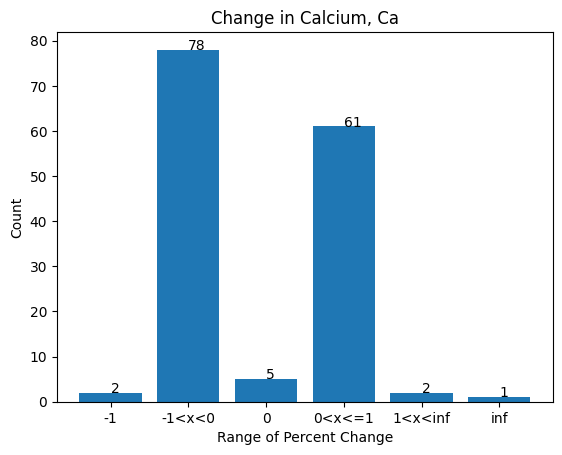

In [629]:
make_comp_bar_chart('Calcium, Ca')

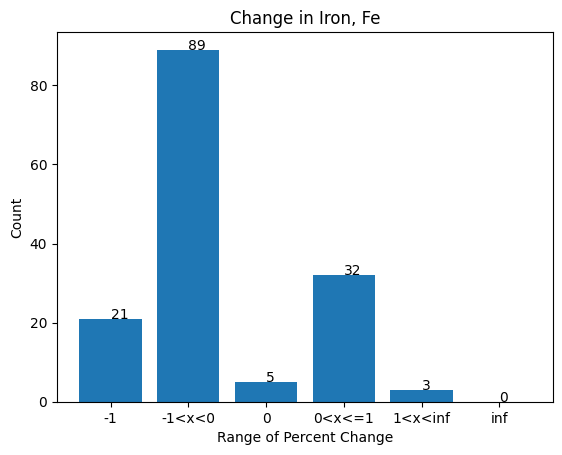

In [630]:
make_comp_bar_chart('Iron, Fe')

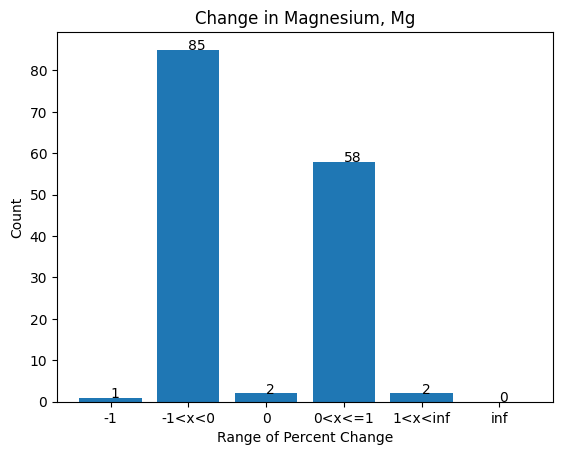

In [631]:
make_comp_bar_chart('Magnesium, Mg')

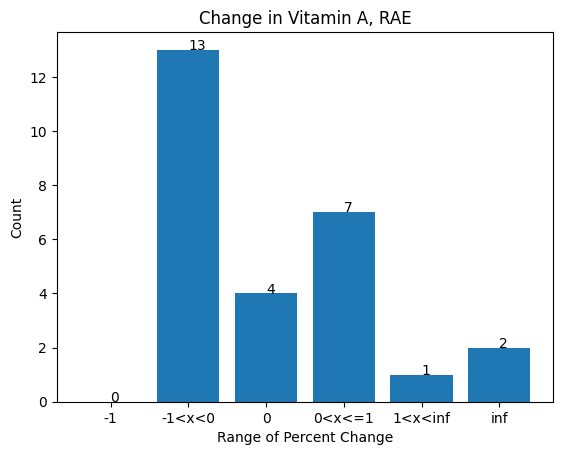

In [632]:
make_comp_bar_chart('Vitamin A, RAE')

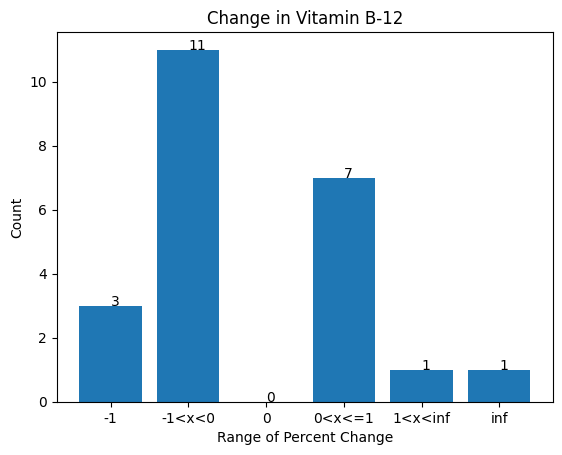

In [633]:
make_comp_bar_chart('Vitamin B-12')

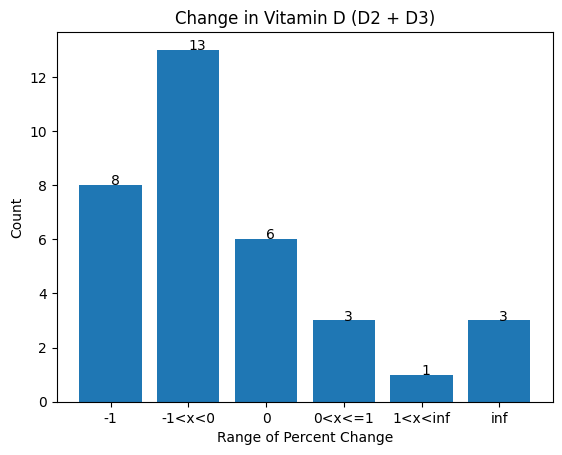

In [634]:
make_comp_bar_chart('Vitamin D (D2 + D3)')

In [635]:
def decreased_content(comp):
  dec_comp_df = net_pos[(net_pos["FF_Component"] == comp) & (net_pos['percent_change']<0)]
  return dec_comp_df[['FF Food description', 'FF_Component', 'percent_change']].sort_values(by="FF Food description")

In [636]:
decreased_content("Calcium, Ca")

,FF Food description,FF_Component,percent_change
2993,"Almond butter, creamy","Calcium, Ca",-0.239769
2368,"Almond milk, unsweetened, plain, shelf stable","Calcium, Ca",-0.123350
2446,"Apple juice, with added vitamin C, from concentrate, shelf stable","Calcium, Ca",-0.112625
2105,"Apples, fuji, with skin, raw","Calcium, Ca",-0.146429
2131,"Apples, gala, with skin, raw","Calcium, Ca",-0.051571
2204,"Apples, honeycrisp, with skin, raw","Calcium, Ca",-0.354333
2087,"Apples, red delicious, with skin, raw","Calcium, Ca",-0.224000
3612,"Applesauce, unsweetened, with added vitamin C","Calcium, Ca",-0.044750
4021,"Beans, kidney, dark red, canned, sodium added, sugar added, drained and rinsed","Calcium, Ca",-0.018276
4067,"Beans, pinto, canned, sodium added, drained and rinsed","Calcium, Ca",-0.137031


In [637]:
decreased_content("Iron, Fe")

,FF Food description,FF_Component,percent_change
2378,"Almond milk, unsweetened, plain, shelf stable","Iron, Fe",-0.171714
2436,"Apple juice, with added vitamin C, from concentrate, shelf stable","Iron, Fe",-0.665333
2117,"Apples, fuji, with skin, raw","Iron, Fe",-0.850000
2137,"Apples, gala, with skin, raw","Iron, Fe",-0.498917
2168,"Apples, granny smith, with skin, raw","Iron, Fe",-0.535800
2191,"Apples, honeycrisp, with skin, raw","Iron, Fe",-1.000000
2076,"Apples, red delicious, with skin, raw","Iron, Fe",-1.000000
3609,"Applesauce, unsweetened, with added vitamin C","Iron, Fe",-0.805435
2044,"Bananas, ripe and slightly ripe, raw","Iron, Fe",-1.000000
3987,"Beans, black, canned, sodium added, drained and rinsed","Iron, Fe",-0.111579


In [638]:
decreased_content("Magnesium, Mg")

,FF Food description,FF_Component,percent_change
2988,"Almond butter, creamy","Magnesium, Mg",-0.040143
2359,"Almond milk, unsweetened, plain, shelf stable","Magnesium, Mg",-0.030714
2442,"Apple juice, with added vitamin C, from concentrate, shelf stable","Magnesium, Mg",-0.027800
2202,"Apples, honeycrisp, with skin, raw","Magnesium, Mg",-0.169800
2082,"Apples, red delicious, with skin, raw","Magnesium, Mg",-0.061000
3979,"Beans, black, canned, sodium added, drained and rinsed","Magnesium, Mg",-0.070286
4099,"Beans, great northern, canned, sodium added, drained and rinsed","Magnesium, Mg",-0.425490
4036,"Beans, kidney, light red, canned, sodium added, sugar added, drained and rinsed","Magnesium, Mg",-0.121034
3991,"Beans, navy, canned, sodium added, drained and rinsed","Magnesium, Mg",-0.371064
4072,"Beans, pinto, canned, sodium added, drained and rinsed","Magnesium, Mg",-0.083667


In [639]:
decreased_content("Vitamin A, RAE")

,FF Food description,FF_Component,percent_change
2343,"Almond milk, unsweetened, plain, shelf stable","Vitamin A, RAE",-0.037209
2045,"Bananas, ripe and slightly ripe, raw","Vitamin A, RAE",-0.666667
1514,"Broccoli, raw","Vitamin A, RAE",-0.741935
703,"Cheese, cheddar","Vitamin A, RAE",-0.042424
814,"Cheese, mozzarella, low moisture, part-skim","Vitamin A, RAE",-0.089686
291,"Cheese, parmesan, grated","Vitamin A, RAE",-0.129771
369,"Cheese, pasteurized process, American, vitamin D fortified","Vitamin A, RAE",-0.053628
105,"Kale, raw","Vitamin A, RAE",-0.518000
1439,"Milk, whole, 3.25% milkfat, with added vitamin D","Vitamin A, RAE",-0.304348
560,"Mustard, prepared, yellow","Vitamin A, RAE",-0.200000


In [640]:
decreased_content("Vitamin B-12")

,FF Food description,FF_Component,percent_change
1891,"Butter, stick, salted",Vitamin B-12,-1.000000
734,"Cheese, cheddar",Vitamin B-12,-0.036364
776,"Cheese, cottage, lowfat, 2% milkfat",Vitamin B-12,-0.106383
821,"Cheese, mozzarella, low moisture, part-skim",Vitamin B-12,-0.017857
277,"Cheese, parmesan, grated",Vitamin B-12,-0.035714
335,"Cheese, pasteurized process, American, vitamin D fortified",Vitamin B-12,-0.033333
3108,"Cream cheese, full fat, block",Vitamin B-12,-1.000000
3119,"Cream, heavy",Vitamin B-12,-1.000000
3137,"Cream, sour, full fat",Vitamin B-12,-0.705952
1340,"Sausage, Italian, pork, mild, cooked, pan-fried",Vitamin B-12,-0.184615


In [641]:
decreased_content("Vitamin D (D2 + D3)")

,FF Food description,FF_Component,percent_change
2342,"Almond milk, unsweetened, plain, shelf stable",Vitamin D (D2 + D3),-0.073000
4373,"Cheese, cotija, solid",Vitamin D (D2 + D3),-1.000000
2873,"Cheese, feta, whole milk, crumbled",Vitamin D (D2 + D3),-1.000000
4272,"Cheese, monterey jack, solid",Vitamin D (D2 + D3),-1.000000
4297,"Cheese, pasteurized process cheese food or product, American, singles",Vitamin D (D2 + D3),-0.320000
4323,"Cheese, provolone, sliced",Vitamin D (D2 + D3),-1.000000
4348,"Cheese, queso fresco, solid",Vitamin D (D2 + D3),-1.000000
140,"Egg, whole, raw, frozen, pasteurized",Vitamin D (D2 + D3),-0.115385
868,"Egg, yolk, raw, frozen, pasteurized",Vitamin D (D2 + D3),-0.033333
1126,"Milk, lowfat, fluid, 1% milkfat, with added vitamin A and vitamin D",Vitamin D (D2 + D3),-0.116667
